In [1]:
##### !!!! Ensure you have Italo's n_back_spatial_task.py in the same directory as this file !!!! ##### 
from VanillaRNN_explorer import (
    NBackLoss,
    test,
    sample_and_train,
    create_n_back_dataset,
    DataLoader
)
import torch
from VanillaRNN_plots import plot_tsne, plot_spatial_correlation, accuracy_results
import matplotlib.pyplot as plt
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")  


=== Training N=0 ===


C:\Users\arthu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(


Epoch 1
-------------------------------
Epoch 2
-------------------------------
Epoch 3
-------------------------------
Epoch 4
-------------------------------
Epoch 5
-------------------------------
Epoch 6
-------------------------------
Epoch 7
-------------------------------
Epoch 8
-------------------------------
Epoch 9
-------------------------------
Epoch 10
-------------------------------
Epoch 11
-------------------------------
Epoch 12
-------------------------------
Epoch 13
-------------------------------
Epoch 14
-------------------------------
Epoch 15
-------------------------------
Epoch 16
-------------------------------
Epoch 17
-------------------------------
Epoch 18
-------------------------------
Epoch 19
-------------------------------
Epoch 20
-------------------------------
Epoch 21
-------------------------------
Epoch 22
-------------------------------
Epoch 23
-------------------------------
Epoch 24
-------------------------------
Epoch 25
----------------

C:\Users\arthu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


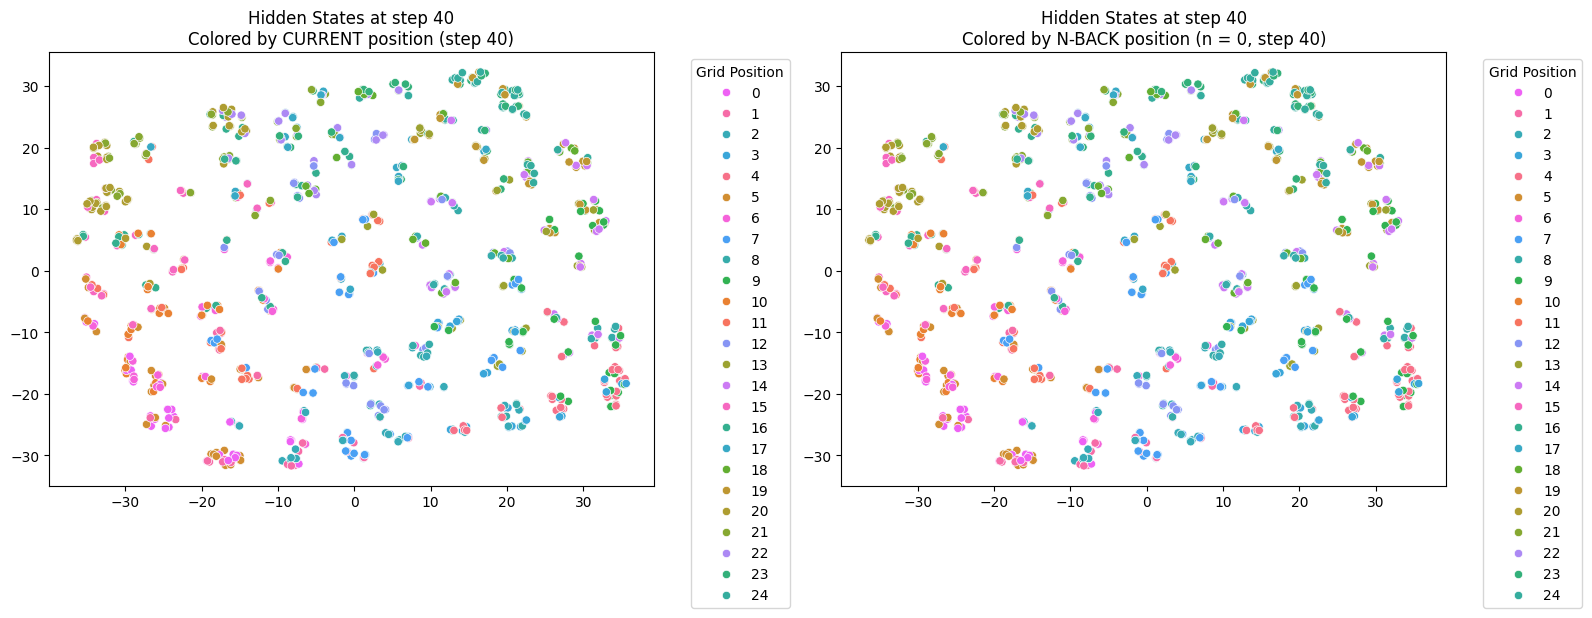

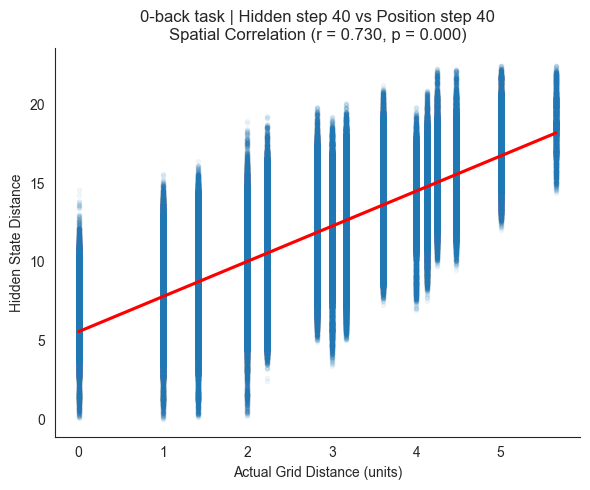


=== Training N=1 ===


C:\Users\arthu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(


Epoch 1
-------------------------------
Epoch 2
-------------------------------
Epoch 3
-------------------------------
Epoch 4
-------------------------------
Epoch 5
-------------------------------
Epoch 6
-------------------------------
Epoch 7
-------------------------------
Epoch 8
-------------------------------
Epoch 9
-------------------------------
Epoch 10
-------------------------------
Epoch 11
-------------------------------
Epoch 12
-------------------------------
Epoch 13
-------------------------------
Epoch 14
-------------------------------
Epoch 15
-------------------------------
Epoch 16
-------------------------------
Epoch 17
-------------------------------
Epoch 18
-------------------------------
Epoch 19
-------------------------------
Epoch 20
-------------------------------
Epoch 21
-------------------------------
Epoch 22
-------------------------------
Epoch 23
-------------------------------
Epoch 24
-------------------------------
Epoch 25
----------------

C:\Users\arthu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


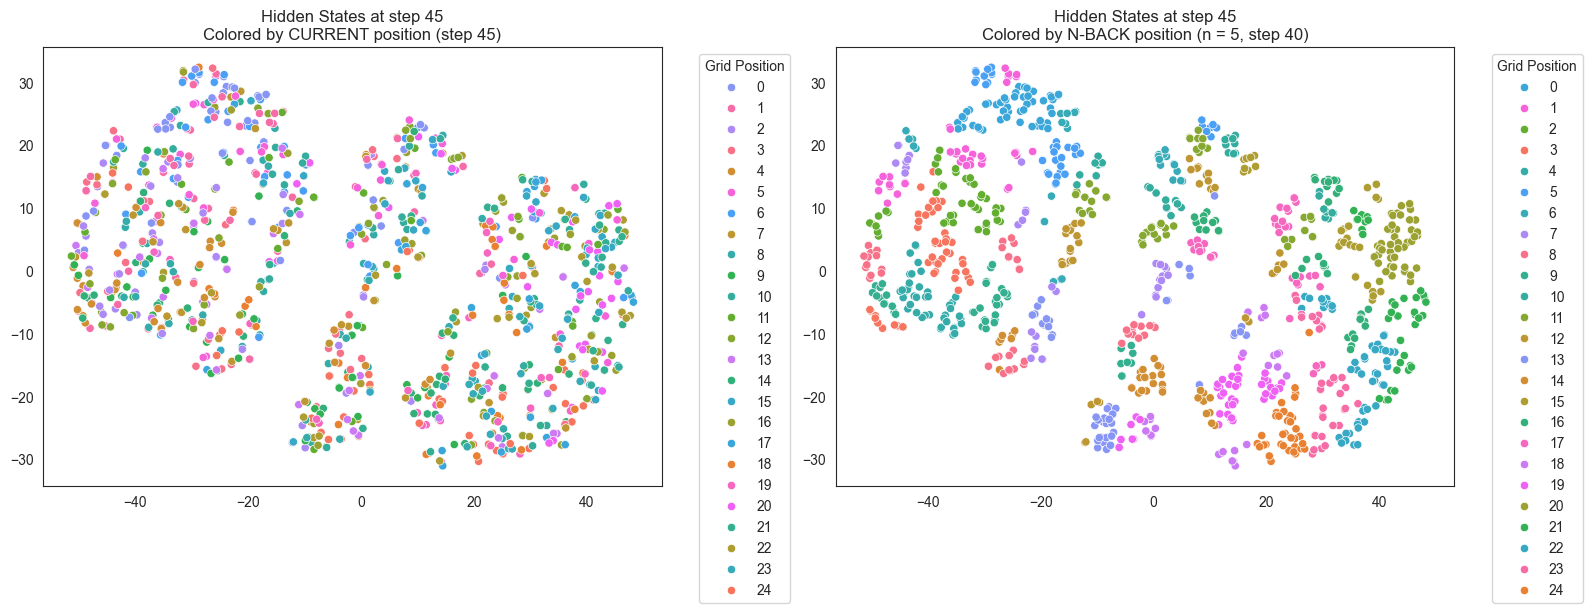

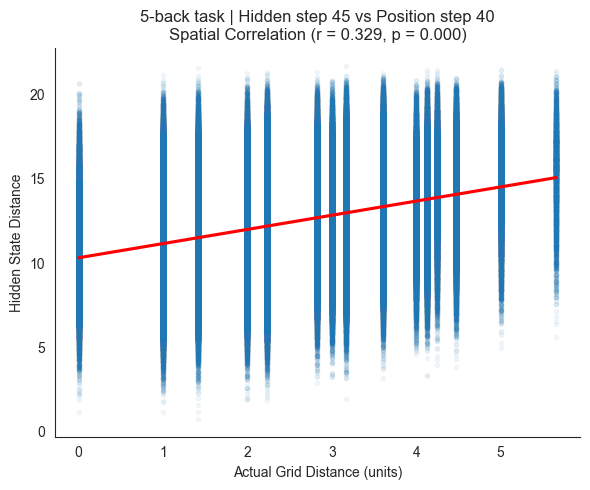

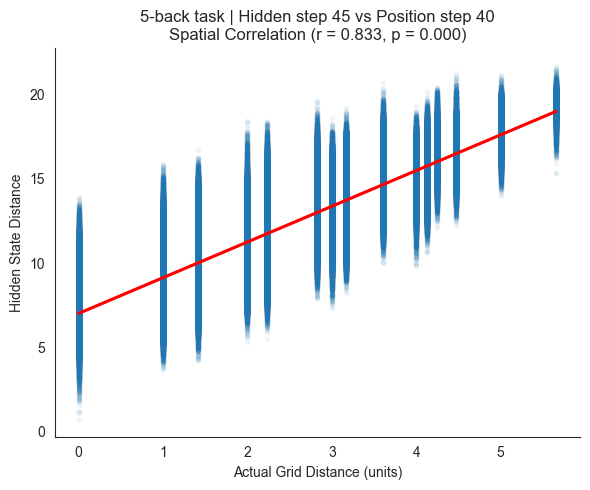


=== Training N=6 ===


C:\Users\arthu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(


Epoch 1
-------------------------------
Epoch 2
-------------------------------
Epoch 3
-------------------------------
Epoch 4
-------------------------------
Epoch 5
-------------------------------
Epoch 6
-------------------------------
Epoch 7
-------------------------------
Epoch 8
-------------------------------
Epoch 9
-------------------------------
Epoch 10
-------------------------------
Epoch 11
-------------------------------
Epoch 12
-------------------------------
Epoch 13
-------------------------------
Epoch 14
-------------------------------
Epoch 15
-------------------------------
Epoch 16
-------------------------------
Epoch 17
-------------------------------
Epoch 18
-------------------------------
Epoch 19
-------------------------------
Epoch 20
-------------------------------
Epoch 21
-------------------------------
Epoch 22
-------------------------------
Epoch 23
-------------------------------
Epoch 24
-------------------------------
Epoch 25
----------------

AssertionError: No hidden states collected for N=10

In [2]:
def run_experiment(max_n=10):
    accuracies = []
    spatial_corrs = []
    
    for N in range(max_n + 1):
        print(f"\n=== Training N={N} ===")
        model, acc, test_loss, train_loss, test_dataloader = sample_and_train(N, hidden_units=256)
        
        if N in [0, 5, 10]:
            # Ensure we get valid data by:
            # 1. Using a time step that's guaranteed to have n-back positions
            # 2. Creating a fresh dataloader with sufficient sequence length
            seq_length = 50 + N  # Ensure enough history for n-back
            analysis_dataloader = DataLoader(
                create_n_back_dataset(1000, N, max_length=seq_length, boundary='strict'),
                batch_size=100
            )
            
            # Choose a time step safely in the middle
            time_step = 40 + N  # Adjusted to ensure n-back positions exist
            
            # Get hidden states and labels - now guaranteed to have data
            _, _, hidden_states, current_labels, nback_labels = test(
                analysis_dataloader, model, NBackLoss(N),
                return_hidden=True, time_step=time_step
            )
            
            # Verify we have data
            assert len(hidden_states) > 0, f"No hidden states collected for N={N}"
            assert len(current_labels) > 0, f"No current labels collected for N={N}"
            if N > 0:
                assert len(nback_labels) > 0, f"No n-back labels collected for N={N}"
            
            # Now we can safely plot
            plot_tsne(hidden_states, current_labels, nback_labels, N, time_step)
            corr = plot_spatial_correlation(hidden_states, current_labels, hidden_step=time_step, N=N)
            spatial_corrs.append(corr)
            
            if N > 0:
                plot_spatial_correlation(hidden_states, nback_labels, hidden_step=time_step, N=N)
            
            accuracies.append(acc[-1])
        else:
            accuracies.append(acc[-1])
    
    return accuracies, spatial_corrs

if __name__ == "__main__":
    accuracies, spatial_corrs = run_experiment()
    
accuracy_results(accuracies)